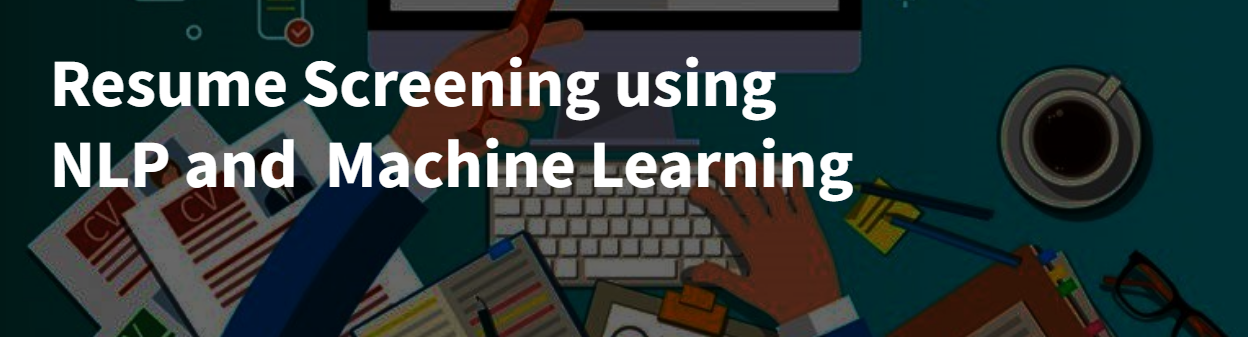

### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

### **Read dataset**
Dataset Link: https://www.kaggle.com/gauravduttakiit/resume-dataset

In [32]:
df = pd.read_csv('./resume_data.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [33]:
df.shape

(962, 2)

In [34]:
sns.set_theme(style="whitegrid")

## **Dataset Insight**
#### Count plot of Resume Categories

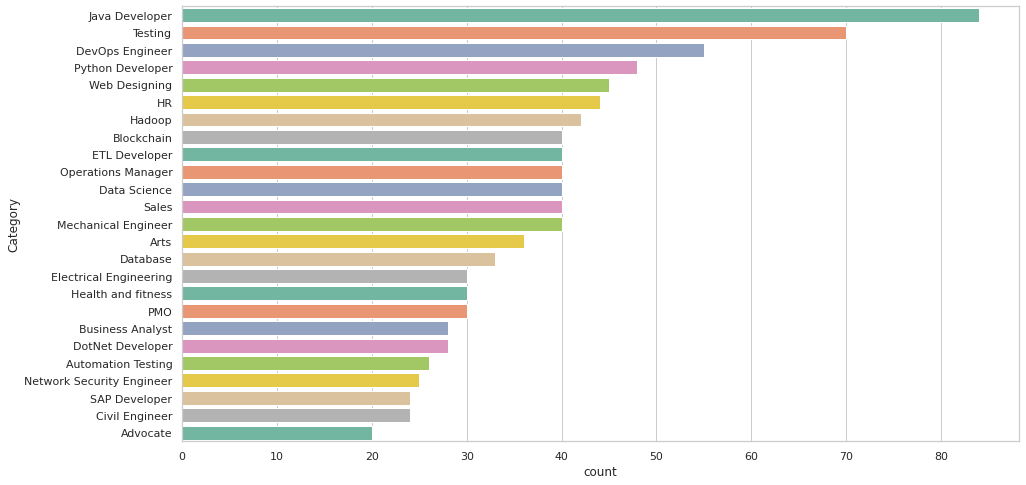

In [35]:
plt.figure(figsize = (15,8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette=sns.color_palette("Set2"))

## **Text Cleaning**
The Resume text contains some irrelevant information such as urls, mentions, hashtags, special characters and punctuations which must be removed before further processing.

In [36]:
def clean_text(text):
  # Remove links
  text = re.sub('http.+', ' ', text) 
  # Remove mentions
  text = re.sub('@\w+', ' ', text)
  # Remove hashtags
  text = re.sub('#\w+', ' ', text)
  # Remove special characters
  text = re.sub('[^a-zA-Z]', ' ', text)
  # Remove multiple spaces, tabs, new lines
  text = re.sub('\s+', ' ', text)
  return text

df['Resume'] = df['Resume'].apply(lambda x: clean_text(x))

In [37]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May to May B E UIT RGPV Data...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


## **Preprocessing**

#### Removal of stop words

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stop_words(text):
  words = [word for word in text.split() if word.lower() not in stop_words]
  text = " ".join(words)
  return text

df['Resume'] = df['Resume'].apply(lambda x: remove_stop_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Converting text into vector representation 

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(sublinear_tf=True, max_features=1000)
word_vectorizer.fit(df['Resume'].values)

features = word_vectorizer.transform(df['Resume'].values)

#### Converting Categorical attribute into numerical representation using Label Encoder

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
labels = df['Category'].values

## **Train Test split**

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size=0.2)

## **Model building and testing**

In [46]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [47]:
clf.score(X_test, y_test)

0.9896373056994818

#### Thus we achive an accuracy of around 99% for the test data

In [48]:
data = {'Prediction':prediction, 'Actual':y_test}
comparison = pd.DataFrame(data)

In [49]:
comparison.head(10)

,Prediction,Actual
0,8,8
1,15,15
2,3,3
3,20,20
4,14,14
5,13,13
6,0,0
7,10,10
8,12,12
9,5,5
